In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Data Collection and EDA

In [75]:
df = pd.read_csv('train.csv')

In [76]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
df.isna().sum().sort_values(ascending=False)

,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Loan_ID,0
Education,0
ApplicantIncome,0


In [78]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [79]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [80]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [81]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [82]:
df.shape

(614, 13)

In [83]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [84]:
## Dropping missing values
df = df.dropna()
df.shape

(480, 13)

In [85]:
#label encoding
df["Loan_Status"] = df["Loan_Status"].map({"N":0,"Y":1})

In [86]:
df["Dependents"] = df["Dependents"].replace("3+",4)

In [87]:
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


## Data Visualization

In [88]:
df["Gender"] = df["Gender"].replace({"Male":1,"Female":0})
df["Married"] = df["Married"].replace({"Yes":1,"No":0})
df["Education"] = df["Education"].replace({"Graduate":1,"Not Graduate":0})
df["Self_Employed"] = df["Self_Employed"].replace({"Yes":1,"No":0})


<ipython-input-88-1bbe0654bdde>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Male":1,"Female":0})
<ipython-input-88-1bbe0654bdde>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Married"] = df["Married"].replace({"Yes":1,"No":0})
<ipython-input-88-1bbe0654bdde>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `p

In [95]:
df["Property_Area"].replace({"Semiurban":1,"Urban":2,"Rural":0}, inplace=True)

<ipython-input-95-10f8249b5b37>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Property_Area"].replace({"Semiurban":1,"Urban":2,"Rural":0}, inplace=True)
<ipython-input-95-10f8249b5b37>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Property_Area"].replace({"Semiurban":1,"Urban":2,"Rural

In [96]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


<Axes: >

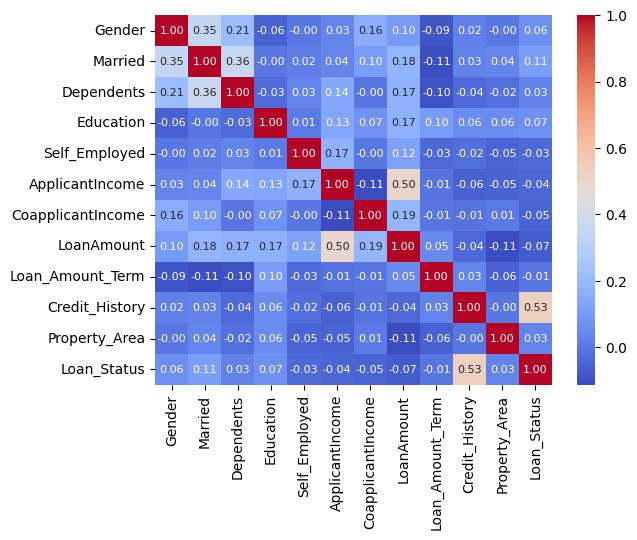

In [102]:
from re import A
#formatting heatmap
sns.heatmap(df.corr(),annot=True, cmap="coolwarm", annot_kws={"fontsize":8}, fmt=".2f")

In [103]:
X = df.drop(columns="Loan_Status",axis=1)
y= df["Loan_Status"]

In [104]:
print(X,y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [123]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


In [124]:
classifiers = {"SVM": svm.SVC(),
               "LogisticRegression": LogisticRegression(),
               "KNN": KNeighborsClassifier(),
               "DecisionTree": DecisionTreeClassifier(),
               "RandomForest": RandomForestClassifier()}

In [125]:
for label,model in classifiers.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(f"Score of {label} is {accuracy_score(y_test,y_pred)}")

Score of SVM is 0.6875
Score of LogisticRegression is 0.8333333333333334
Score of KNN is 0.7083333333333334
Score of DecisionTree is 0.7083333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score of RandomForest is 0.8020833333333334


In [131]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
#building predictive model
input_data = [1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0]
input_data_array = np.asarray(input_data)
input_data_reshaped = input_data_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

if (prediction[0]==0):
  print("Loan will not be approved")
else:
  print("Loan will be approved")


Loan will be approved


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [138]:
import joblib
with open("model.pkl","wb") as file:
  joblib.dump(model,file)